## All in one

Pascal P.  
Mar 2020  

- Course: *Introduction to Deep Learning & Neural Networks with Keras*
- Final Project: Build a Regression Model in Keras - All models with comparison

<hr />

<hr />

**Custom extension combining all models in one notebook**

<hr />

In [1]:
import pp_utils as pp

Using TensorFlow backend.


### 1.1. Download, load and clean the data

In [2]:
import pandas as pd
import numpy as np

In [3]:
# df_concrete_data = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv')

df_concrete_data = pd.read_csv("./concrete_data.csv")
df_concrete_data.head(7)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70


In [4]:
df_concrete_data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [5]:
# Any null value?
df_concrete_data.isnull().sum()
# ... No, good. 

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

### 1.2. Split data into predictors and target

In [6]:
## Exclude columns 'Age', 'Strength' for predictors
df_predictors = df_concrete_data[df_concrete_data.columns.difference(['Age', 'Strength'])]

df_target = df_concrete_data['Strength']

### 1.3. Normalizing

In [7]:
df_predictors_norm = (df_predictors - df_predictors.mean()) / df_predictors.std()
df_predictors_norm.head()

,Blast Furnace Slag,Cement,Coarse Aggregate,Fine Aggregate,Fly Ash,Superplasticizer,Water
0,-0.856472,2.476712,0.862735,-1.217079,-0.846733,-0.620147,-0.916319
1,-0.856472,2.476712,1.055651,-1.217079,-0.846733,-0.620147,-0.916319
2,0.795140,0.491187,-0.526262,-2.239829,-0.846733,-1.038638,2.174405
3,0.795140,0.491187,-0.526262,-2.239829,-0.846733,-1.038638,2.174405
4,0.678079,-0.790075,0.070492,0.647569,-0.846733,-1.038638,0.488555


In [8]:
n_cols = df_predictors_norm.shape[1]  # == df_predictors
n_cols # number of predictors

7

### 1.4. Baseline model

In [9]:
model = pp.regression_model(n_cols, nodes_per_hlayer=[10]) # 
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                80        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________


In [10]:
mse_ary = pp.train_eval_loop(n_cols, df_predictors, df_target, N=50, epochs=50, n_p_hl=[10]) 

W0322 10:54:52.626319 140020835665728 deprecation_wrapper.py:119] From /home/pascal/Projects/ML_DL/anaconda3/envs/tensorflow_keras_gpuenv/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



Iteration:  0 / MSE: 202.42301
Iteration:  1 / MSE: 207.01059
Iteration:  2 / MSE: 863.05018
Iteration:  3 / MSE: 989.06217
Iteration:  4 / MSE: 442.04138
Iteration:  5 / MSE: 264.72076
Iteration:  6 / MSE: 882.24851
Iteration:  7 / MSE: 1070.05195
Iteration:  8 / MSE: 2901.14574
Iteration:  9 / MSE: 1410.57777
Iteration: 10 / MSE: 284.27646
Iteration: 11 / MSE: 189.79941
Iteration: 12 / MSE: 217.81692
Iteration: 13 / MSE: 212.05040
Iteration: 14 / MSE: 543.69669
Iteration: 15 / MSE: 888.38757
Iteration: 16 / MSE: 209.09156
Iteration: 17 / MSE: 198.92263
Iteration: 18 / MSE: 352.88271
Iteration: 19 / MSE: 179.08937
Iteration: 20 / MSE: 193.44001
Iteration: 21 / MSE: 222.95358
Iteration: 22 / MSE: 518.19559
Iteration: 23 / MSE: 434.10038
Iteration: 24 / MSE: 187.61384
Iteration: 25 / MSE: 1175.52184
Iteration: 26 / MSE: 512.25190
Iteration: 27 / MSE: 195.75329
Iteration: 28 / MSE: 314.21132
Iteration: 29 / MSE: 262.76495
Iteration: 30 / MSE: 181.70890
Iteration: 31 / MSE: 218.84691
Iter

In [11]:
np_ary = pp.summary(mse_ary, label="baseline model")

Summary baseline model: 
mean(MSE): 500.07921 / unbiased std(MSE): 568.30815 / biased std(MSE): 562.59636


In [12]:
pp.summary_ext(np_ary)

max: 2901.14574 at epoch:  8 / min: 179.08937 at epoch: 19


In [13]:
df = pp.save_df(np_ary, label='mse_01_bl', fname='11_baseline_model.csv')
df.head()

,mse_01_bl
0,202.423013
1,207.010588
2,863.050178
3,989.062165
4,442.041380


### 1.5. Normalized model

In [14]:
mse_norm_ary = pp.train_eval_loop(n_cols, df_predictors_norm, df_target, N=50, epochs=50, n_p_hl=[10]) 

Iteration:  0 / MSE: 293.29944
Iteration:  1 / MSE: 345.92081
Iteration:  2 / MSE: 426.86051
Iteration:  3 / MSE: 325.80493
Iteration:  4 / MSE: 375.27394
Iteration:  5 / MSE: 334.33579
Iteration:  6 / MSE: 354.35690
Iteration:  7 / MSE: 644.32649
Iteration:  8 / MSE: 303.00841
Iteration:  9 / MSE: 373.95550
Iteration: 10 / MSE: 372.20734
Iteration: 11 / MSE: 661.10783
Iteration: 12 / MSE: 310.83496
Iteration: 13 / MSE: 442.80741
Iteration: 14 / MSE: 547.19272
Iteration: 15 / MSE: 309.44402
Iteration: 16 / MSE: 473.45867
Iteration: 17 / MSE: 404.20898
Iteration: 18 / MSE: 434.58824
Iteration: 19 / MSE: 416.78042
Iteration: 20 / MSE: 530.71526
Iteration: 21 / MSE: 302.75864
Iteration: 22 / MSE: 331.99026
Iteration: 23 / MSE: 305.50828
Iteration: 24 / MSE: 425.32036
Iteration: 25 / MSE: 468.88989
Iteration: 26 / MSE: 292.18708
Iteration: 27 / MSE: 477.69946
Iteration: 28 / MSE: 404.49376
Iteration: 29 / MSE: 486.57351
Iteration: 30 / MSE: 348.79886
Iteration: 31 / MSE: 341.77660
Iteratio

In [15]:
np_norm_ary = pp.summary(mse_norm_ary, label="normalized model")

Summary normalized model: 
mean(MSE): 393.04831 / unbiased std(MSE): 93.18617 / biased std(MSE): 92.24960


In [16]:
pp.summary_ext(np_norm_ary)

max: 672.20691 at epoch: 32 / min: 292.18708 at epoch: 26


In [17]:
df = pp.save_df(np_norm_ary, label='mse_02_norm', fname='12_normalized_model.csv', 
                prev_csv='11_baseline_model.csv', prev_df=df)

### 1.6. Normalized model with 100 epochs

In [18]:
mse_norm100_ary = pp.train_eval_loop(n_cols, df_predictors_norm, df_target, N=50, epochs=100, n_p_hl=[10])  

Iteration:  0 / MSE: 243.06795
Iteration:  1 / MSE: 240.88377
Iteration:  2 / MSE: 206.74328
Iteration:  3 / MSE: 221.47607
Iteration:  4 / MSE: 216.30225
Iteration:  5 / MSE: 210.63183
Iteration:  6 / MSE: 209.55883
Iteration:  7 / MSE: 218.93233
Iteration:  8 / MSE: 208.34282
Iteration:  9 / MSE: 219.72780
Iteration: 10 / MSE: 203.61642
Iteration: 11 / MSE: 221.25967
Iteration: 12 / MSE: 212.19008
Iteration: 13 / MSE: 230.78437
Iteration: 14 / MSE: 223.10228
Iteration: 15 / MSE: 219.27893
Iteration: 16 / MSE: 208.73732
Iteration: 17 / MSE: 222.62194
Iteration: 18 / MSE: 210.37689
Iteration: 19 / MSE: 229.44040
Iteration: 20 / MSE: 225.77407
Iteration: 21 / MSE: 213.58242
Iteration: 22 / MSE: 237.53782
Iteration: 23 / MSE: 224.75938
Iteration: 24 / MSE: 216.31853
Iteration: 25 / MSE: 201.43080
Iteration: 26 / MSE: 227.58923
Iteration: 27 / MSE: 217.95289
Iteration: 28 / MSE: 217.37822
Iteration: 29 / MSE: 252.25120
Iteration: 30 / MSE: 239.42162
Iteration: 31 / MSE: 222.96539
Iteratio

In [19]:
np_norm100_ary = pp.summary(mse_norm100_ary, label="normalized 100 epoch model")

Summary normalized 100 epoch model: 
mean(MSE): 220.16967 / unbiased std(MSE): 11.63943 / biased std(MSE): 11.52245


In [20]:
pp.summary_ext(np_norm100_ary)

max: 252.25120 at epoch: 29 / min: 201.43080 at epoch: 25


In [21]:
df = pp.save_df(np_norm100_ary, label='mse_03_norm100', fname='13_normalized_100eoch_model.csv', 
                prev_csv='12_normalized_model.csv', prev_df=df)

### 1.7. Normalized model with 3 hidden layers

In [22]:
model = pp.regression_model(n_cols, nodes_per_hlayer=[10, 10, 10]) # 
model.summary()

Model: "sequential_152"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_303 (Dense)            (None, 10)                80        
_________________________________________________________________
dense_304 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_305 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_306 (Dense)            (None, 1)                 11        
Total params: 311
Trainable params: 311
Non-trainable params: 0
_________________________________________________________________


In [23]:
mse_norm_3hl_ary = pp.train_eval_loop(n_cols, df_predictors_norm, df_target, N=50, epochs=50, 
                                      n_p_hl=[10, 10, 10])

Iteration:  0 / MSE: 197.96650
Iteration:  1 / MSE: 195.65100
Iteration:  2 / MSE: 185.91332
Iteration:  3 / MSE: 197.41985
Iteration:  4 / MSE: 198.25296
Iteration:  5 / MSE: 190.22290
Iteration:  6 / MSE: 197.80909
Iteration:  7 / MSE: 190.57817
Iteration:  8 / MSE: 203.12779
Iteration:  9 / MSE: 189.12403
Iteration: 10 / MSE: 192.13600
Iteration: 11 / MSE: 186.14364
Iteration: 12 / MSE: 167.82419
Iteration: 13 / MSE: 189.29370
Iteration: 14 / MSE: 190.28790
Iteration: 15 / MSE: 190.00143
Iteration: 16 / MSE: 198.90881
Iteration: 17 / MSE: 192.71368
Iteration: 18 / MSE: 196.83225
Iteration: 19 / MSE: 193.58226
Iteration: 20 / MSE: 183.20690
Iteration: 21 / MSE: 189.67665
Iteration: 22 / MSE: 194.12626
Iteration: 23 / MSE: 200.25488
Iteration: 24 / MSE: 193.20345
Iteration: 25 / MSE: 190.28230
Iteration: 26 / MSE: 185.49285
Iteration: 27 / MSE: 196.87226
Iteration: 28 / MSE: 190.29386
Iteration: 29 / MSE: 184.84795
Iteration: 30 / MSE: 191.40140
Iteration: 31 / MSE: 180.61910
Iteratio

In [24]:
np_norm_3hl_ary = pp.summary(mse_norm_3hl_ary, label="normalized 3 hidden layers model")

Summary normalized 3 hidden layers model: 
mean(MSE): 191.95423 / unbiased std(MSE): 7.35910 / biased std(MSE): 7.28514


In [25]:
pp.summary_ext(np_norm_3hl_ary)

max: 203.12779 at epoch:  8 / min: 167.04014 at epoch: 48


In [26]:
df = pp.save_df(np_norm_3hl_ary, label='mse_04_norm_3hl', fname='14_normalized_3hl_model.csv', 
                prev_csv='13_normalized_100eoch_model.csv', prev_df=df)

### 1.8. Results comparison

#### 1 - Comparison normalized model (B)  to baseline model (A)

- the MSE is *less* (therefore better) for the normalized model (B).

- Also the spread for the normalized model, as measured by standard deviation, is *less* (less variability) than it is for the baseline model.

- Here normalization does seem to improve the performance in term of:  
  - mean (although not by that much in this case) and 
  - standard deviation.
  
  
#### 2 - Comparison normalized model with 100 epochs  (C)  to normalized model (B) and baseline model (A)

- More iterations does improve significantly both the mean of MSE and (reduce) the spread (standard deviation) compare to both previous normalized model (with 50 epochs) and the baseline model.



#### 3 -Comparison normalized model with 3 hidden layers  to normalized model (B).

- More (hidden) layers does improve (even more) the mean MSE and the spread compare to all previous models. 

### 1.9. Summary

In [27]:
df.head()

,mse_01_bl,mse_02_norm,mse_03_norm100,mse_04_norm_3hl
0,202.423013,293.299437,243.067954,197.966500
1,207.010588,345.920812,240.883772,195.650999
2,863.050178,426.860508,206.743278,185.913316
3,989.062165,325.804934,221.476072,197.419849
4,442.041380,375.273944,216.302253,198.252957


In [28]:
df.describe()

,mse_01_bl,mse_02_norm,mse_03_norm100,mse_04_norm_3hl
count,50.000000,50.000000,50.000000,50.000000
mean,500.079213,393.048313,220.169670,191.954232
std,568.308148,93.186171,11.639429,7.359100
min,179.089366,292.187082,201.430804,167.040144
25%,203.569907,325.210044,210.831826,189.757842
50%,265.909847,373.081419,218.646379,193.365210
75%,504.862077,425.250476,226.886297,196.960436
max,2901.145737,672.206907,252.251195,203.127785


In [29]:
df.shape

(50, 4)

In [30]:
df.columns

Index(['mse_01_bl', 'mse_02_norm', 'mse_03_norm100', 'mse_04_norm_3hl'], dtype='object')

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'MSE')

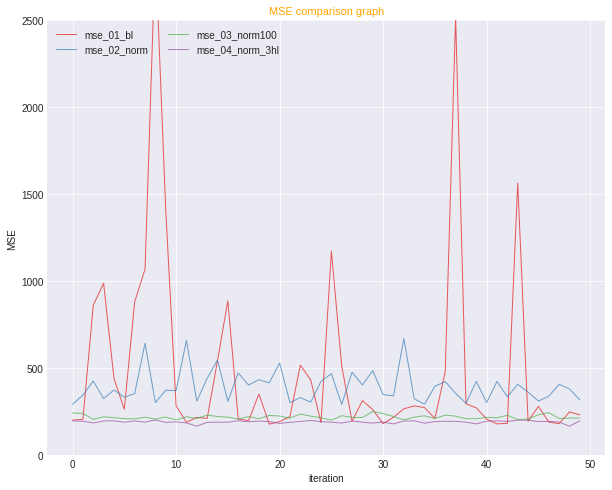

In [32]:
fig = plt.figure(figsize=(10, 8))

# style
plt.style.use('seaborn-darkgrid')

# create a color palette
palette = plt.get_cmap('Set1')

# multiple lines plot
plt.ylim(0, 2500)
ixes = list(range(0, df.shape[0]))
for ix, col in enumerate(df):
  plt.plot(ixes, df[col], marker='', color=palette(ix), linewidth=1, alpha=0.7, 
           label=df.columns[ix])

# Add legend
plt.legend(loc=2, ncol=2)

# Add titles
plt.title("MSE comparison graph", loc='center', fontsize=11, fontweight=0, color='orange')
plt.xlabel("iteration")
plt.ylabel("MSE")

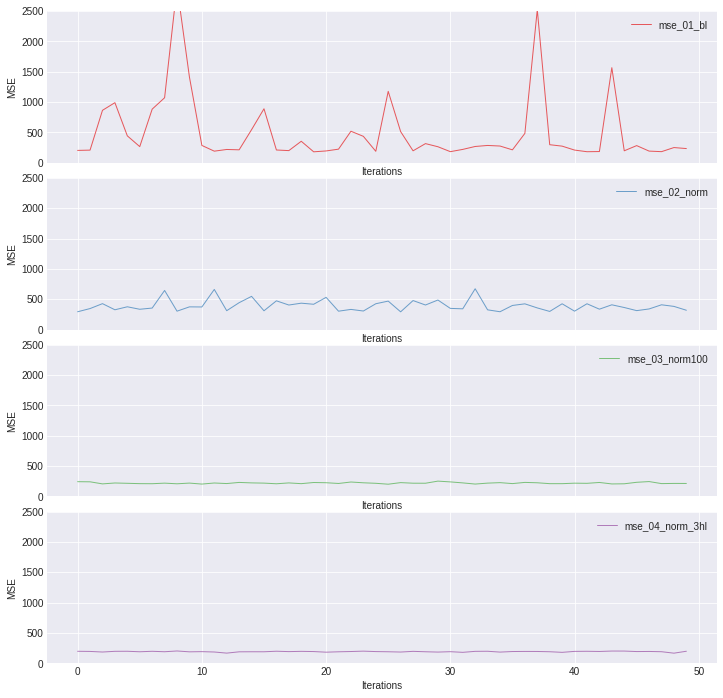

In [33]:
fig, axs = plt.subplots(4, 1, sharex=True, sharey=True, figsize=(12, 12),
                        gridspec_kw={'hspace': 0.1, 'wspace': 0.2})

ixes = list(range(0, df.shape[0]))
plt.ylim(0, 2500)
for ix, col in enumerate(df):
  ax = axs[ix]
  ax.plot(ixes, df[col], marker='', color=palette(ix), linewidth=1, alpha=0.7, 
          label=df.columns[ix])
  
  ax.set_xlabel('Iterations')
  ax.set_ylabel('MSE')
  ax.legend(loc="upper right")